In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [2]:
df = pd.read_csv("Задания/Datasets/iris.txt")
df.columns = ['SPLength', 'SPWidth', 'PTLength', 'PTWidth', 'Species']
print(df.shape)
df.head(20)

(149, 5)


,SPLength,SPWidth,PTLength,PTWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [3]:
df['Species'] = df['Species'].str.replace('Iris-', '', regex=False)
df.head(2)

,SPLength,SPWidth,PTLength,PTWidth,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SPLength  149 non-null    float64
 1   SPWidth   149 non-null    float64
 2   PTLength  149 non-null    float64
 3   PTWidth   149 non-null    float64
 4   Species   149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data = df.copy()
df.isnull().sum()

SPLength    0
SPWidth     0
PTLength    0
PTWidth     0
Species     0
dtype: int64

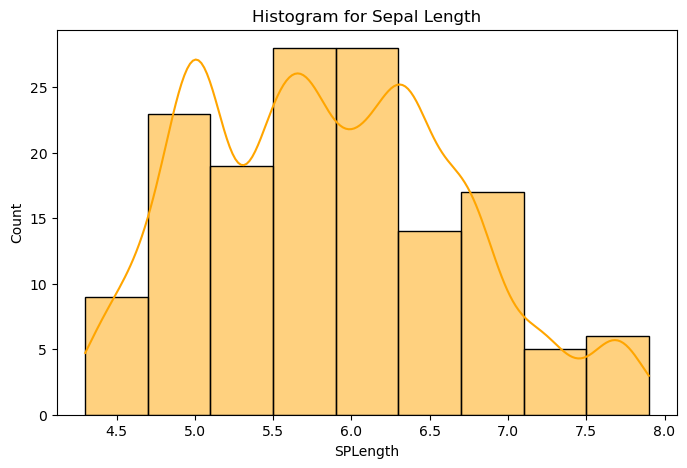

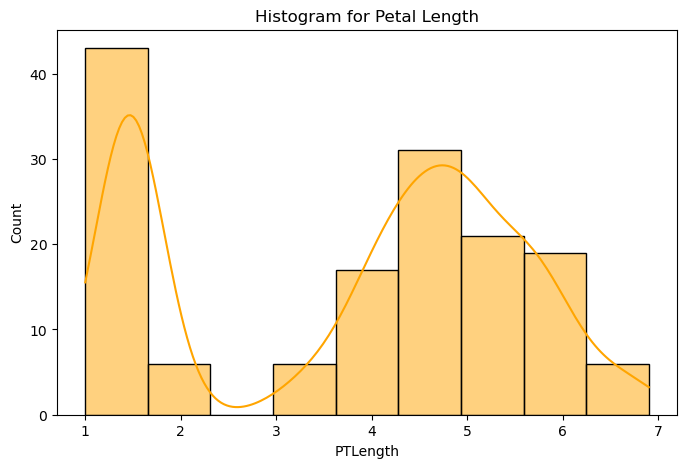

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data['SPLength'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the smoothing level of the KDE
plt.title(f'Histogram for Sepal Length')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data['PTLength'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the smoothing level of the KDE
plt.title(f'Histogram for Petal Length')
plt.show()

In [7]:
# Shapiro-Wilk test for Sepal Length
stat, p = stats.shapiro(df['SPLength'])
print('Shapiro-Wilk for Sepal Length:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("No normal distribution")
if p > 0.05:
    print("There is a normal distribution")

# Shapiro-Wilk test for Petal Length
stat, p = stats.shapiro(df['PTLength'])
print('Shapiro-Wilk for Petal Length:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("No normal distribution")
if p > 0.05:
    print("There is a normal distribution")

Shapiro-Wilk for Sepal Length:
Statistic: 0.9768275695872636 p-value: 0.012714618787229303
No normal distribution
Shapiro-Wilk for Petal Length:
Statistic: 0.8774444757621048 p-value: 9.304441124938255e-10
No normal distribution


    Гипотеза о нормальном  распределении не выполняется для общей кучи

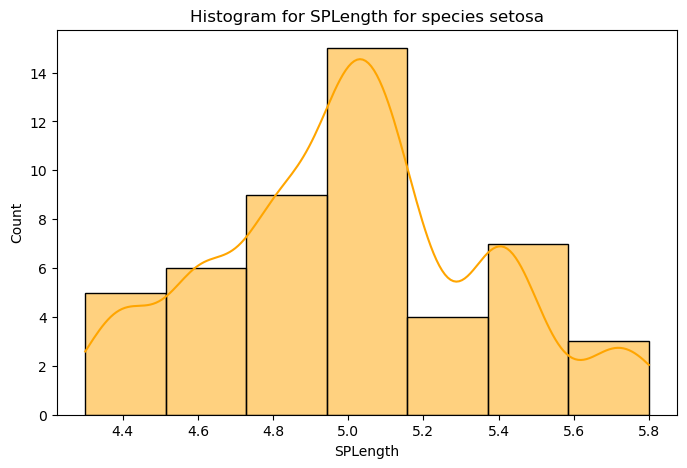

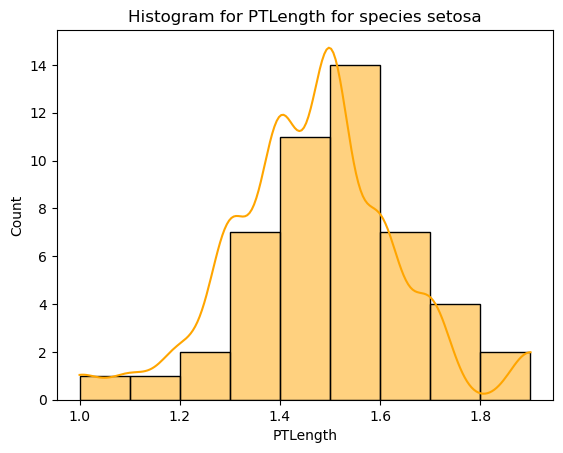

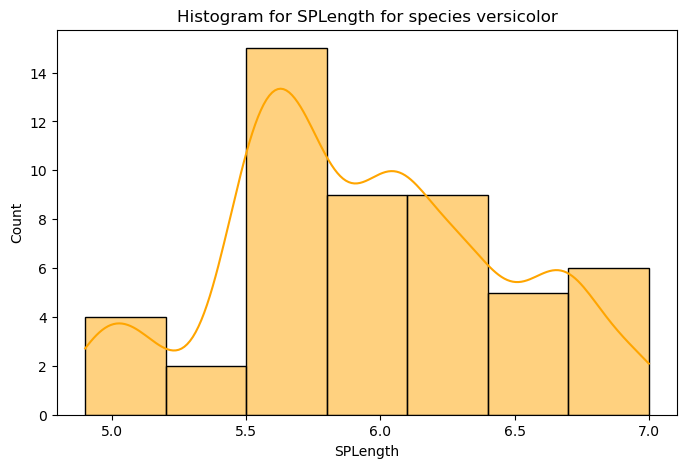

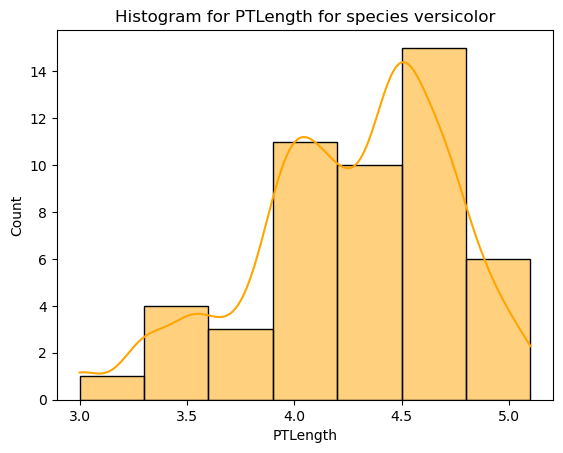

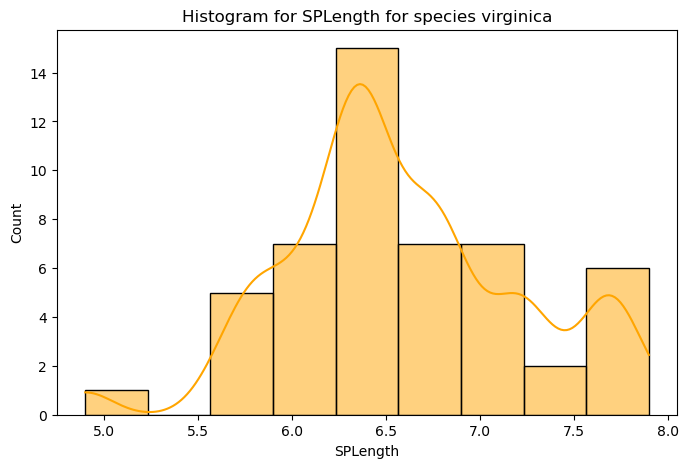

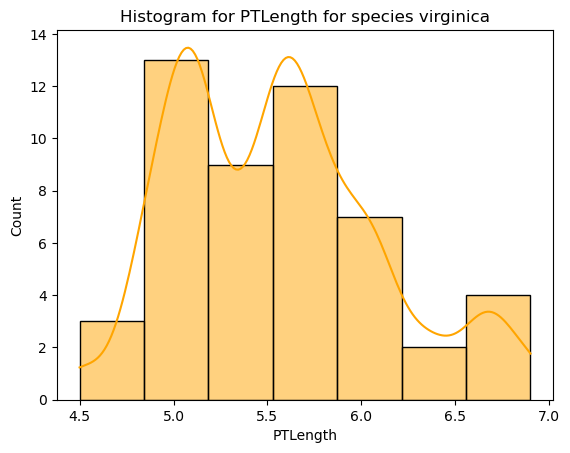

In [8]:
for i in ['setosa', 'versicolor', 'virginica']:
    subdata = df[df['Species'] == i]
    
    plt.figure(figsize=(8, 5))
    sns.histplot(subdata['SPLength'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
    # kde=True adds a density line
    # bw_adjust adjusts the level of smoothing for the KDE
    plt.title(f'Histogram for SPLength for species {i}')
    plt.show()
    
    sns.histplot(subdata['PTLength'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
    # kde=True adds a density line
    # bw_adjust adjusts the level of smoothing for the KDE
    plt.title(f'Histogram for PTLength for species {i}')
    plt.show()

In [9]:
for i in ['setosa', 'versicolor', 'virginica']:
    subdata = df[df['Species'] == i]
    
    # Shapiro-Wilk test for Sepal Length
    stat, p = stats.shapiro(subdata['SPLength'])
    print(f'Shapiro-Wilk for sepal length {i}:')
    print('Statistic:', stat, 'p-value:', p)
    if p < 0.05:
        print("There is no normal distribution")
    if p > 0.05:
        print("There is a normal distribution")
        
    # Shapiro-Wilk test for Petal Length
    stat, p = stats.shapiro(subdata['PTLength'])
    print(f'Shapiro-Wilk for petal length {i}:')
    print('Statistic:', stat, 'p-value:', p)
    if p < 0.05:
        print("There is no normal distribution")
    if p > 0.05:
        print("There is a normal distribution")

Shapiro-Wilk for sepal length setosa:
Statistic: 0.9780593886700596 p-value: 0.48686132469565074
There is a normal distribution
Shapiro-Wilk for petal length setosa:
Statistic: 0.9563882261708665 p-value: 0.06728967511168371
There is a normal distribution
Shapiro-Wilk for sepal length versicolor:
Statistic: 0.9778356785897524 p-value: 0.46473703592503574
There is a normal distribution
Shapiro-Wilk for petal length versicolor:
Statistic: 0.9660044025433202 p-value: 0.15847783815657984
There is a normal distribution
Shapiro-Wilk for sepal length virginica:
Statistic: 0.9711793971110263 p-value: 0.2583147461407979
There is a normal distribution
Shapiro-Wilk for petal length virginica:
Statistic: 0.9621864428612805 p-value: 0.10977536903223795
There is a normal distribution


In [10]:
# Extracting weight data
data = df[['SPLength', 'SPWidth', 'PTLength', 'PTWidth']]

# Calculating the mean and standard deviation for each column
mean = data.mean()
std_dev = data.std(ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Determine the critical value (z-value for normal distribution)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate the standard error
standard_error = std_dev / np.sqrt(n)

# Calculate confidence intervals
margin_of_error = z_critical * standard_error

# Confidence intervals for the mean
confidence_intervals = (mean - margin_of_error, mean + margin_of_error)

# Determine the critical values for chi-squared
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Calculate confidence intervals for the standard deviation
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

# Output results
for column in data.columns:
    print(f"Confidence interval for standard deviation {column}: ({lower_bound[column]:.2f}, {upper_bound[column]:.2f})")
    print(f"Confidence interval for mean {column}: {confidence_intervals[0][column]:.2f} - {confidence_intervals[1][column]:.2f}\n")

Confidence interval for standard deviation SPLength: (0.74, 0.94)
Confidence interval for mean SPLength: 5.72 - 5.98

Confidence interval for standard deviation SPWidth: (0.39, 0.49)
Confidence interval for mean SPWidth: 2.98 - 3.12

Confidence interval for standard deviation PTLength: (1.58, 1.99)
Confidence interval for mean PTLength: 3.49 - 4.06

Confidence interval for standard deviation PTWidth: (0.68, 0.86)
Confidence interval for mean PTWidth: 1.08 - 1.33

